In [1]:
!pip install -r requirements.txt

Looking in indexes: https://nexus.cnj.jus.br/repository/pypi-all/simple
You are using pip version 18.1, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


'''

cursos.alura.com.br/course/deep-learning-previsao-keras

github.com/alura-cursos/deeptime



'''

'\n\ncursos.alura.com.br/course/deep-learning-previsao-keras\n\ngithub.com/alura-cursos/deeptime\n\n\n\n'

In [7]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size'] = 22

In [8]:
passageiros = pd.read_csv('Passageiros.csv')

In [9]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


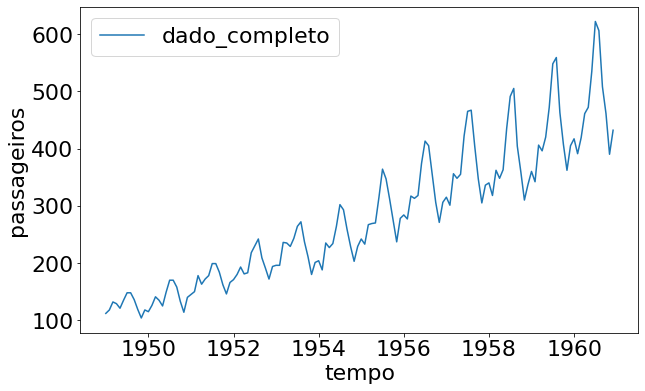

In [10]:
def plotar_dados(dados):
    sns.lineplot(x='tempo', y='passageiros', data=dados, label='dado_completo')
    
plotar_dados(passageiros)

In [11]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)
dado_escalado

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546],
       [-1.47949574, -1.47469699],
       [-1.4554389 , -1.35759023],
       [-1.43138206, -1.38268454],
       [-1.40732522, -1.29067209],
       [-1.38326837, -1.16520057],
       [-1.35921153, -1.21538918],
       [-1.33515469, -1.29903686],
       [-1.31109785, -1.09828242],
       [-1.28704101, -0.9226223 ],
       [-1.26298417, -0.9226223 ],
       [-1.23892733, -1.02299951],
       [-1.21487049, -1.23211871],
       [-1.19081364, -1.3910493 ],
       [-1.1667568 , -1.17356534],
       [-1.14269996, -1.1317415 ],
       [-1.11864312, -1.08991766],
       [-1.09458628, -0.85570415],
       [-1.07052944, -0.98117567],
       [-1.0464726 ,

In [12]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

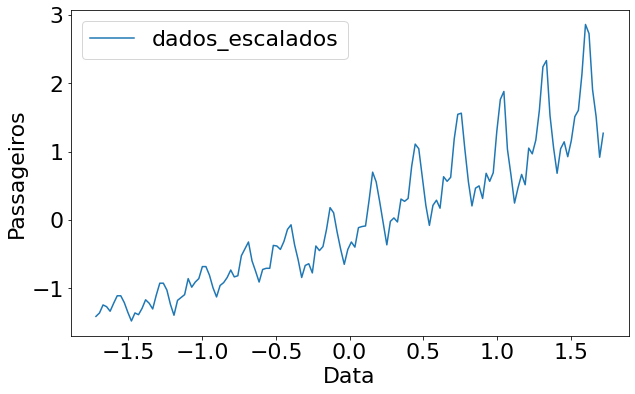

In [13]:
def plotar_eixos(x, y, label):
    sns.lineplot(x=x, y=y, label=label)
    plt.ylabel('Passageiros')
    plt.xlabel('Data')


plotar_eixos(x, y, 'dados_escalados')

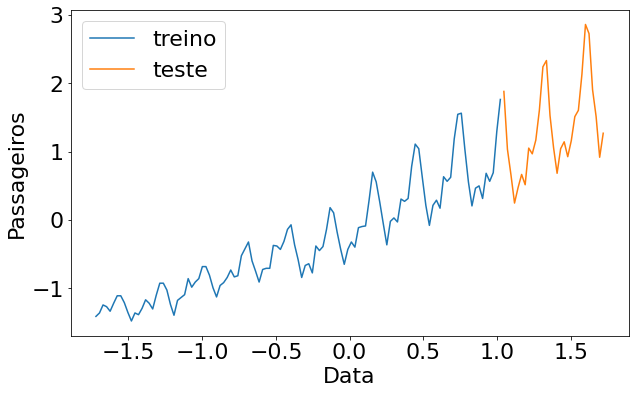

In [14]:
tamanho_treino = int(len(passageiros)*0.8)
tamanho_teste = int(len(passageiros)*0.2)

x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
x_teste  = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

plotar_eixos(x_treino, y_treino, 'treino')
plotar_eixos(x_teste, y_teste, 'teste')

In [28]:
def definir_modelo(hyperparams=[], loss='mean_squared_error', optimizer='adam'):
    
    modelo = Sequential()

    for i in range(0, len(hyperparams)):
        modelo.add(Dense(hyperparams[i]['dimensao_saida'],
                         input_dim=1,
                         activation=hyperparams[i]['activation'],
                         kernel_initializer = hyperparams[i]['kernel_initializer'],
                         use_bias=hyperparams[i]['use_bias']))

    modelo.compile(loss=loss,
                   metrics=['accuracy'],
                   optimizer=optimizer)

    modelo.summary()

    return modelo

In [29]:
def plotar_resultados(x, y):
    dados = {'tempo':x, 'passageiros': y[:,0]}
    resultados = pd.DataFrame(data=dados)
    resultados_inversos = sc.inverse_transform(resultados)
    x, y = resultados_inversos[:,0], resultados_inversos[:,1]
    plotar_eixos(x, y, 'predições')

In [30]:
def testar_modelo(hyperparams, epocas_treino=5):
    modelo = definir_modelo(hyperparams)
    modelo.fit(x_treino, y_treino, epochs=epocas_treino)
    y_predict = modelo.predict(x_treino)
    y_predict_teste = modelo.predict(x_teste)
    plotar_dados(passageiros)
    plotar_resultados(x_treino, y_predict)
    plotar_resultados(x_teste, y_predict_teste)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
115/115 [==============================] - 0s 444us/sample - loss: 0.1017 - acc: 0.0000e+00
Epoch 2/5
115/115 [==============================] - 0s 40us/sample - loss: 0.1011 - acc: 0.0000e+00
Epoch 3/5
115/115 [==============================] - 0s 45us/sample - loss: 0.1005 - acc: 0.0000e+00
Epoch 4/5
115/115 [==============================] - 0s 34us/sample - loss: 0.0999 - acc: 0.0000e+00
Epoch 5/5
115/115 [==============================] - 0s 32us/sample - loss: 0.0994 - acc: 0.0000e+00


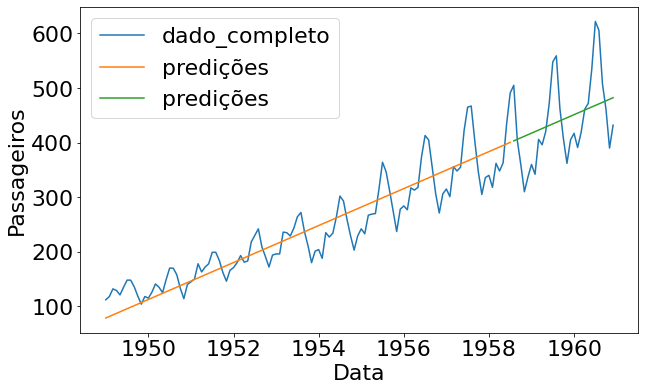

In [14]:
hyperparams_1=[{
    
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'Ones',
    'use_bias':True,    
}]

testar_modelo(hyperparams_1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
115/115 [==============================] - 0s 283us/sample - loss: 0.1016 - acc: 0.0000e+00
Epoch 2/5
115/115 [==============================] - 0s 43us/sample - loss: 0.1010 - acc: 0.0000e+00
Epoch 3/5
115/115 [==============================] - 0s 42us/sample - loss: 0.1004 - acc: 0.0000e+00
Epoch 4/5
115/115 [==============================] - 0s 30us/sample - loss: 0.0998 - acc: 0.0000e+00
Epoch 5/5
115/115 [==============================] - 0s 48us/sample - loss: 0.0992 - acc: 0.0000e+00


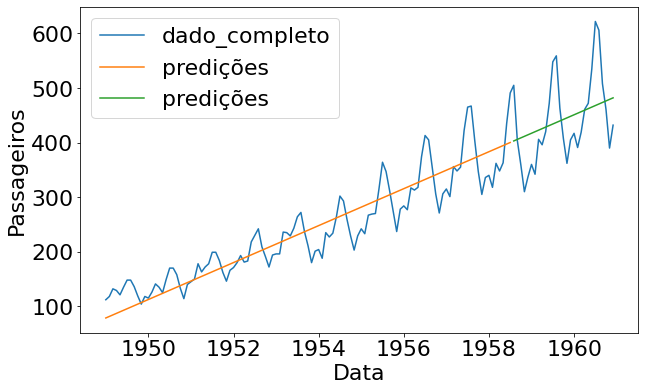

In [15]:
hyperparams_2=[{
    
    'dimensao_saida':1,
   'activation':'linear',
    'kernel_initializer':'Ones',
    'use_bias':False,
    
}]

testar_modelo(hyperparams_2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
115/115 [==============================] - 0s 337us/sample - loss: 0.6925 - acc: 0.0000e+00
Epoch 2/100
115/115 [==============================] - 0s 48us/sample - loss: 0.6922 - acc: 0.0000e+00
Epoch 3/100
115/115 [==============================] - 0s 41us/

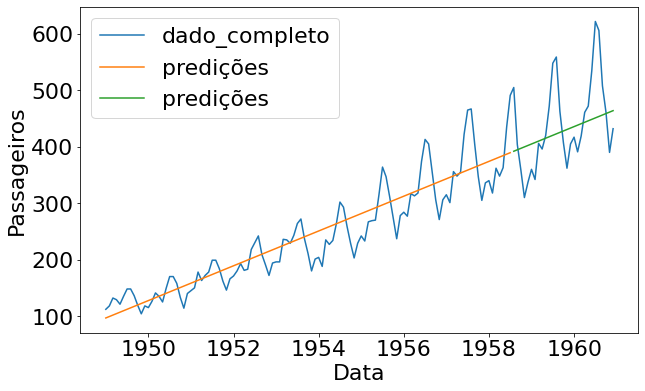

In [16]:
hyperparams_3 = [{
    
    'dimensao_saida':8,
   'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
},


{
    'dimensao_saida':8,
   'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
},
    
    {
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
}



]

testar_modelo(hyperparams_3, epocas_treino=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
115/115 [==============================] - 0s 477us/sample - loss: 0.7261 - acc: 0.0000e+00
Epoch 2/500
115/115 [==============================] - 0s 62us/sample - loss: 0.7106 - acc: 0.0000e+00
Epoch 3/500
115/115 [==============================] - 0s 46us/sample - loss: 0.6960 - acc: 0.0000e+00
Epoch 4/500
115/115 [==============================] - 0s 73us/sample - loss: 

115/115 [==============================] - 0s 50us/sample - loss: 0.5217 - acc: 0.0000e+00
Epoch 151/500
115/115 [==============================] - 0s 48us/sample - loss: 0.5206 - acc: 0.0000e+00
Epoch 152/500
115/115 [==============================] - 0s 49us/sample - loss: 0.5193 - acc: 0.0000e+00
Epoch 153/500
115/115 [==============================] - 0s 36us/sample - loss: 0.5181 - acc: 0.0000e+00
Epoch 154/500
115/115 [==============================] - 0s 53us/sample - loss: 0.5167 - acc: 0.0000e+00
Epoch 155/500
115/115 [==============================] - 0s 44us/sample - loss: 0.5155 - acc: 0.0000e+00
Epoch 156/500
115/115 [==============================] - 0s 39us/sample - loss: 0.5139 - acc: 0.0000e+00
Epoch 157/500
115/115 [==============================] - 0s 53us/sample - loss: 0.5125 - acc: 0.0000e+00
Epoch 158/500
115/115 [==============================] - 0s 37us/sample - loss: 0.5111 - acc: 0.0000e+00
Epoch 159/500
115/115 [==============================] - 0s 49us/samp

Epoch 304/500
115/115 [==============================] - 0s 37us/sample - loss: 0.1126 - acc: 0.0000e+00
Epoch 305/500
115/115 [==============================] - 0s 50us/sample - loss: 0.1119 - acc: 0.0000e+00
Epoch 306/500
115/115 [==============================] - 0s 36us/sample - loss: 0.1113 - acc: 0.0000e+00
Epoch 307/500
115/115 [==============================] - 0s 43us/sample - loss: 0.1106 - acc: 0.0000e+00
Epoch 308/500
115/115 [==============================] - 0s 35us/sample - loss: 0.1101 - acc: 0.0000e+00
Epoch 309/500
115/115 [==============================] - 0s 39us/sample - loss: 0.1096 - acc: 0.0000e+00
Epoch 310/500
115/115 [==============================] - 0s 42us/sample - loss: 0.1091 - acc: 0.0000e+00
Epoch 311/500
115/115 [==============================] - 0s 35us/sample - loss: 0.1086 - acc: 0.0000e+00
Epoch 312/500
115/115 [==============================] - 0s 39us/sample - loss: 0.1081 - acc: 0.0000e+00
Epoch 313/500
115/115 [==============================] 

115/115 [==============================] - 0s 46us/sample - loss: 0.0978 - acc: 0.0000e+00
Epoch 383/500
115/115 [==============================] - 0s 40us/sample - loss: 0.0978 - acc: 0.0000e+00
Epoch 384/500
115/115 [==============================] - 0s 41us/sample - loss: 0.0978 - acc: 0.0000e+00
Epoch 385/500
115/115 [==============================] - 0s 49us/sample - loss: 0.0977 - acc: 0.0000e+00
Epoch 386/500
115/115 [==============================] - 0s 39us/sample - loss: 0.0977 - acc: 0.0000e+00
Epoch 387/500
115/115 [==============================] - 0s 58us/sample - loss: 0.0977 - acc: 0.0000e+00
Epoch 388/500
115/115 [==============================] - 0s 36us/sample - loss: 0.0976 - acc: 0.0000e+00
Epoch 389/500
115/115 [==============================] - 0s 41us/sample - loss: 0.0976 - acc: 0.0000e+00
Epoch 390/500
115/115 [==============================] - 0s 40us/sample - loss: 0.0976 - acc: 0.0000e+00
Epoch 391/500
115/115 [==============================] - 0s 36us/samp

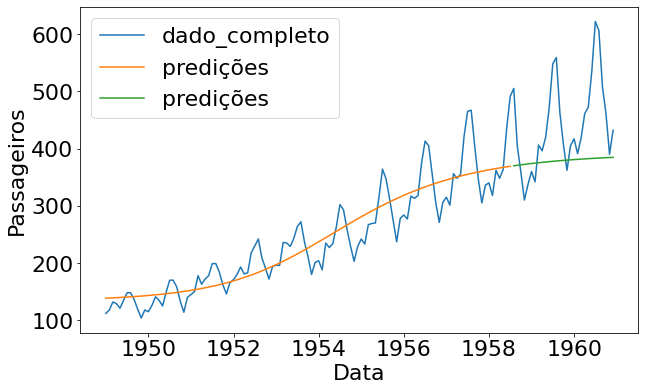

In [17]:
hyperparams_4 = [{
    
    'dimensao_saida':8,
   'activation':'sigmoid',
    'kernel_initializer':'random_uniform',
    'use_bias':True,
    
},


{
    'dimensao_saida':8,
   'activation':'sigmoid',
    'kernel_initializer':'random_uniform',
    'use_bias':True,
    
},
    
    {
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':True,
    
}



]

testar_modelo(hyperparams_4, epocas_treino=500)

In [20]:
def altera_perspectiva(dados, passos_atraso):
    
    X_novo, y_novo = [], []
    
    vetor = pd.DataFrame(dados)[0]
    
    for i in (range(passos_atraso, vetor.shape[0])):
        X_novo.append(list(vetor.loc[i-passos_atraso:i-1]))
        y_novo.append(vetor.loc[i])
    
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [25]:
X_treino_novo, y_treino_novo = altera_perspectiva(y_treino, 1)
print(X_treino_novo[0:5])
print(y_treino_novo[0:5])

[[-1.40777884]
 [-1.35759023]
 [-1.24048348]
 [-1.26557778]
 [-1.33249593]]
[-1.35759023 -1.24048348 -1.26557778 -1.33249593 -1.21538918]


In [26]:
X_teste_novo, y_teste_novo = altera_perspectiva(y_teste, 1)
print(X_teste_novo[0:5])
print(y_teste_novo[0:5])

[[1.87957499]
 [1.03473342]
 [0.65831886]
 [0.24844523]
 [0.47429396]]
[1.03473342 0.65831886 0.24844523 0.47429396 0.66668363]


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
115/115 [==============================] - 0s 833us/sample - loss: 0.6932 - acc: 0.0000e+00
Epoch 2/100
115/115 [==============================] - 0s 61us/sample - loss: 0.6142 - acc: 0.0000e+00
Epoch 3/100
115/115 [==============================] - 0s 82us/

115/115 [==============================] - 0s 49us/sample - loss: 0.0877 - acc: 0.0000e+00
Epoch 69/100
115/115 [==============================] - 0s 51us/sample - loss: 0.0876 - acc: 0.0000e+00
Epoch 70/100
115/115 [==============================] - 0s 50us/sample - loss: 0.0876 - acc: 0.0000e+00
Epoch 71/100
115/115 [==============================] - 0s 54us/sample - loss: 0.0876 - acc: 0.0000e+00
Epoch 72/100
115/115 [==============================] - 0s 67us/sample - loss: 0.0877 - acc: 0.0000e+00
Epoch 73/100
115/115 [==============================] - 0s 67us/sample - loss: 0.0876 - acc: 0.0000e+00
Epoch 74/100
115/115 [==============================] - 0s 58us/sample - loss: 0.0876 - acc: 0.0000e+00
Epoch 75/100
115/115 [==============================] - 0s 56us/sample - loss: 0.0875 - acc: 0.0000e+00
Epoch 76/100
115/115 [==============================] - 0s 72us/sample - loss: 0.0880 - acc: 0.0000e+00
Epoch 77/100
115/115 [==============================] - 0s 65us/sample - loss

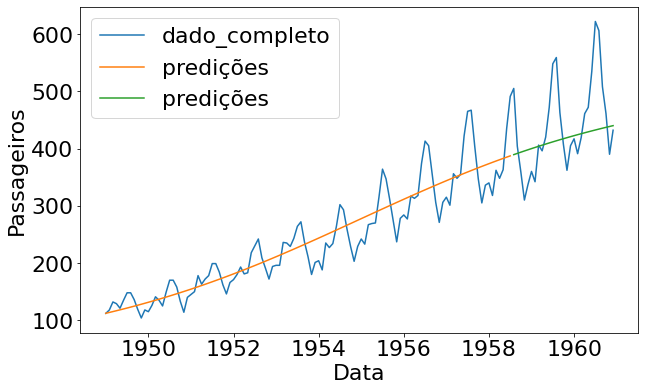

In [31]:
hyperparams_5 = [{
    
    'dimensao_saida':8,
   'activation':'linear',
    'kernel_initializer':'ones',
    'use_bias':False,
    
},


{
    'dimensao_saida':64,
   'activation':'sigmoid',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
},
    
    {
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
}



]

testar_modelo(hyperparams_5, epocas_treino=100)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_16 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
115/115 [==============================] - 0s 631us/sample - loss: 0.7058 - acc: 0.0000e+00
Epoch 2/500
115/115 [==============================] - 0s 63us/sample - loss: 0.6125 - acc: 0.0000e+00
Epoch 3/500
115/115 [==============================] - 0s 66us/sample - loss: 0.5571 - acc: 0.0000e+00
Epoch 4/500
115/115 [==============================] - 0s 54us/sample - loss

115/115 [==============================] - 0s 56us/sample - loss: 0.0880 - acc: 0.0000e+00
Epoch 72/500
115/115 [==============================] - 0s 65us/sample - loss: 0.0881 - acc: 0.0000e+00
Epoch 73/500
115/115 [==============================] - 0s 54us/sample - loss: 0.0881 - acc: 0.0000e+00
Epoch 74/500
115/115 [==============================] - 0s 77us/sample - loss: 0.0878 - acc: 0.0000e+00
Epoch 75/500
115/115 [==============================] - 0s 105us/sample - loss: 0.0881 - acc: 0.0000e+00
Epoch 76/500
115/115 [==============================] - 0s 54us/sample - loss: 0.0879 - acc: 0.0000e+00
Epoch 77/500
115/115 [==============================] - 0s 83us/sample - loss: 0.0880 - acc: 0.0000e+00
Epoch 78/500
115/115 [==============================] - 0s 124us/sample - loss: 0.0883 - acc: 0.0000e+00
Epoch 79/500
115/115 [==============================] - 0s 72us/sample - loss: 0.0877 - acc: 0.0000e+00
Epoch 80/500
115/115 [==============================] - 0s 70us/sample - lo

115/115 [==============================] - 0s 67us/sample - loss: 0.0871 - acc: 0.0000e+00
Epoch 150/500
115/115 [==============================] - 0s 59us/sample - loss: 0.0872 - acc: 0.0000e+00
Epoch 151/500
115/115 [==============================] - 0s 62us/sample - loss: 0.0870 - acc: 0.0000e+00
Epoch 152/500
115/115 [==============================] - 0s 62us/sample - loss: 0.0870 - acc: 0.0000e+00
Epoch 153/500
115/115 [==============================] - 0s 52us/sample - loss: 0.0871 - acc: 0.0000e+00
Epoch 154/500
115/115 [==============================] - 0s 73us/sample - loss: 0.0870 - acc: 0.0000e+00
Epoch 155/500
115/115 [==============================] - 0s 55us/sample - loss: 0.0871 - acc: 0.0000e+00
Epoch 156/500
115/115 [==============================] - 0s 65us/sample - loss: 0.0870 - acc: 0.0000e+00
Epoch 157/500
115/115 [==============================] - 0s 61us/sample - loss: 0.0870 - acc: 0.0000e+00
Epoch 158/500
115/115 [==============================] - 0s 62us/samp

115/115 [==============================] - 0s 53us/sample - loss: 0.0866 - acc: 0.0000e+00
Epoch 228/500
115/115 [==============================] - 0s 55us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 229/500
115/115 [==============================] - 0s 91us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 230/500
115/115 [==============================] - 0s 51us/sample - loss: 0.0863 - acc: 0.0000e+00
Epoch 231/500
115/115 [==============================] - 0s 66us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 232/500
115/115 [==============================] - 0s 60us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 233/500
115/115 [==============================] - 0s 63us/sample - loss: 0.0867 - acc: 0.0000e+00
Epoch 234/500
115/115 [==============================] - 0s 66us/sample - loss: 0.0872 - acc: 0.0000e+00
Epoch 235/500
115/115 [==============================] - 0s 61us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 236/500
115/115 [==============================] - 0s 105us/sam

115/115 [==============================] - 0s 75us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 306/500
115/115 [==============================] - 0s 62us/sample - loss: 0.0862 - acc: 0.0000e+00
Epoch 307/500
115/115 [==============================] - 0s 54us/sample - loss: 0.0871 - acc: 0.0000e+00
Epoch 308/500
115/115 [==============================] - 0s 54us/sample - loss: 0.0862 - acc: 0.0000e+00
Epoch 309/500
115/115 [==============================] - 0s 73us/sample - loss: 0.0866 - acc: 0.0000e+00
Epoch 310/500
115/115 [==============================] - 0s 55us/sample - loss: 0.0862 - acc: 0.0000e+00
Epoch 311/500
115/115 [==============================] - 0s 67us/sample - loss: 0.0861 - acc: 0.0000e+00
Epoch 312/500
115/115 [==============================] - 0s 61us/sample - loss: 0.0864 - acc: 0.0000e+00
Epoch 313/500
115/115 [==============================] - 0s 52us/sample - loss: 0.0864 - acc: 0.0000e+00
Epoch 314/500
115/115 [==============================] - 0s 59us/samp

115/115 [==============================] - 0s 56us/sample - loss: 0.0863 - acc: 0.0000e+00
Epoch 384/500
115/115 [==============================] - 0s 53us/sample - loss: 0.0867 - acc: 0.0000e+00
Epoch 385/500
115/115 [==============================] - 0s 58us/sample - loss: 0.0862 - acc: 0.0000e+00
Epoch 386/500
115/115 [==============================] - 0s 50us/sample - loss: 0.0859 - acc: 0.0000e+00
Epoch 387/500
115/115 [==============================] - 0s 59us/sample - loss: 0.0862 - acc: 0.0000e+00
Epoch 388/500
115/115 [==============================] - 0s 58us/sample - loss: 0.0859 - acc: 0.0000e+00
Epoch 389/500
115/115 [==============================] - 0s 89us/sample - loss: 0.0860 - acc: 0.0000e+00
Epoch 390/500
115/115 [==============================] - 0s 51us/sample - loss: 0.0863 - acc: 0.0000e+00
Epoch 391/500
115/115 [==============================] - 0s 71us/sample - loss: 0.0866 - acc: 0.0000e+00
Epoch 392/500
115/115 [==============================] - 0s 68us/samp

115/115 [==============================] - 0s 60us/sample - loss: 0.0857 - acc: 0.0000e+00
Epoch 462/500
115/115 [==============================] - 0s 53us/sample - loss: 0.0865 - acc: 0.0000e+00
Epoch 463/500
115/115 [==============================] - 0s 65us/sample - loss: 0.0860 - acc: 0.0000e+00
Epoch 464/500
115/115 [==============================] - 0s 53us/sample - loss: 0.0858 - acc: 0.0000e+00
Epoch 465/500
115/115 [==============================] - 0s 74us/sample - loss: 0.0860 - acc: 0.0000e+00
Epoch 466/500
115/115 [==============================] - 0s 56us/sample - loss: 0.0859 - acc: 0.0000e+00
Epoch 467/500
115/115 [==============================] - 0s 58us/sample - loss: 0.0858 - acc: 0.0000e+00
Epoch 468/500
115/115 [==============================] - 0s 70us/sample - loss: 0.0858 - acc: 0.0000e+00
Epoch 469/500
115/115 [==============================] - 0s 68us/sample - loss: 0.0857 - acc: 0.0000e+00
Epoch 470/500
115/115 [==============================] - 0s 61us/samp

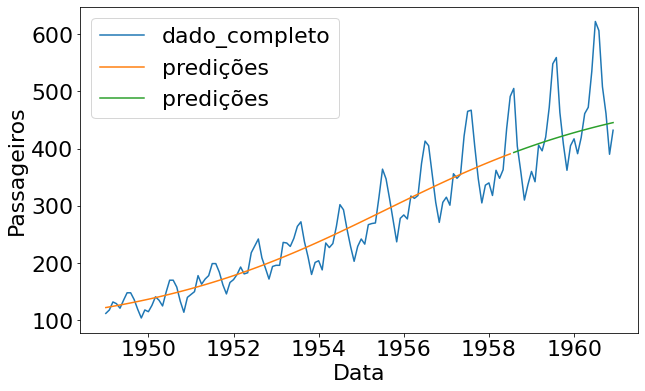

In [36]:
hyperparams_5 = [{
    
    'dimensao_saida':8,
   'activation':'linear',
    'kernel_initializer':'ones',
    'use_bias':True,
    
},


{
    'dimensao_saida':64,
   'activation':'sigmoid',
    'kernel_initializer':'random_uniform',
    'use_bias':True,
    
},
    
    {
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':True,
    
}



]

testar_modelo(hyperparams_5, epocas_treino=500)